In [1]:
import pandas as pd
import numpy as np

In [17]:
and_df = pd.DataFrame({'a':[0, 0, 1, 1],
                       'b':[0, 1, 0, 1],
                       'out':[0, 0, 0, 1]})

or_df = pd.DataFrame({'a':[0, 0, 1, 1],
                       'b':[0, 1, 0, 1],
                       'out':[0, 1, 1, 1]})

xor_df = pd.DataFrame({'a':[0, 0, 1, 1],
                       'b':[0, 1, 0, 1],
                       'out':[0, 1, 1, 0]})

df_list = [and_df, or_df, xor_df]

In [12]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(12, activation='relu', input_dim=2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 12)                36        
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

In [46]:
import matplotlib.pyplot as plt

def fit_model(df, path, epochs=100):
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True, monitor='loss')
    history = model.fit(df[['a', 'b']], df['out'], epochs=epochs, callbacks=early_stopping_cb, verbose=False)
    
    return history

In [47]:
history = []
for df in df_list:
    history.append(fit_model(df, 'and_or_xor.h5', 200))

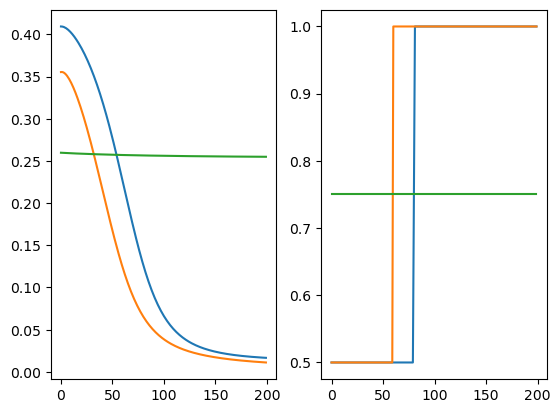

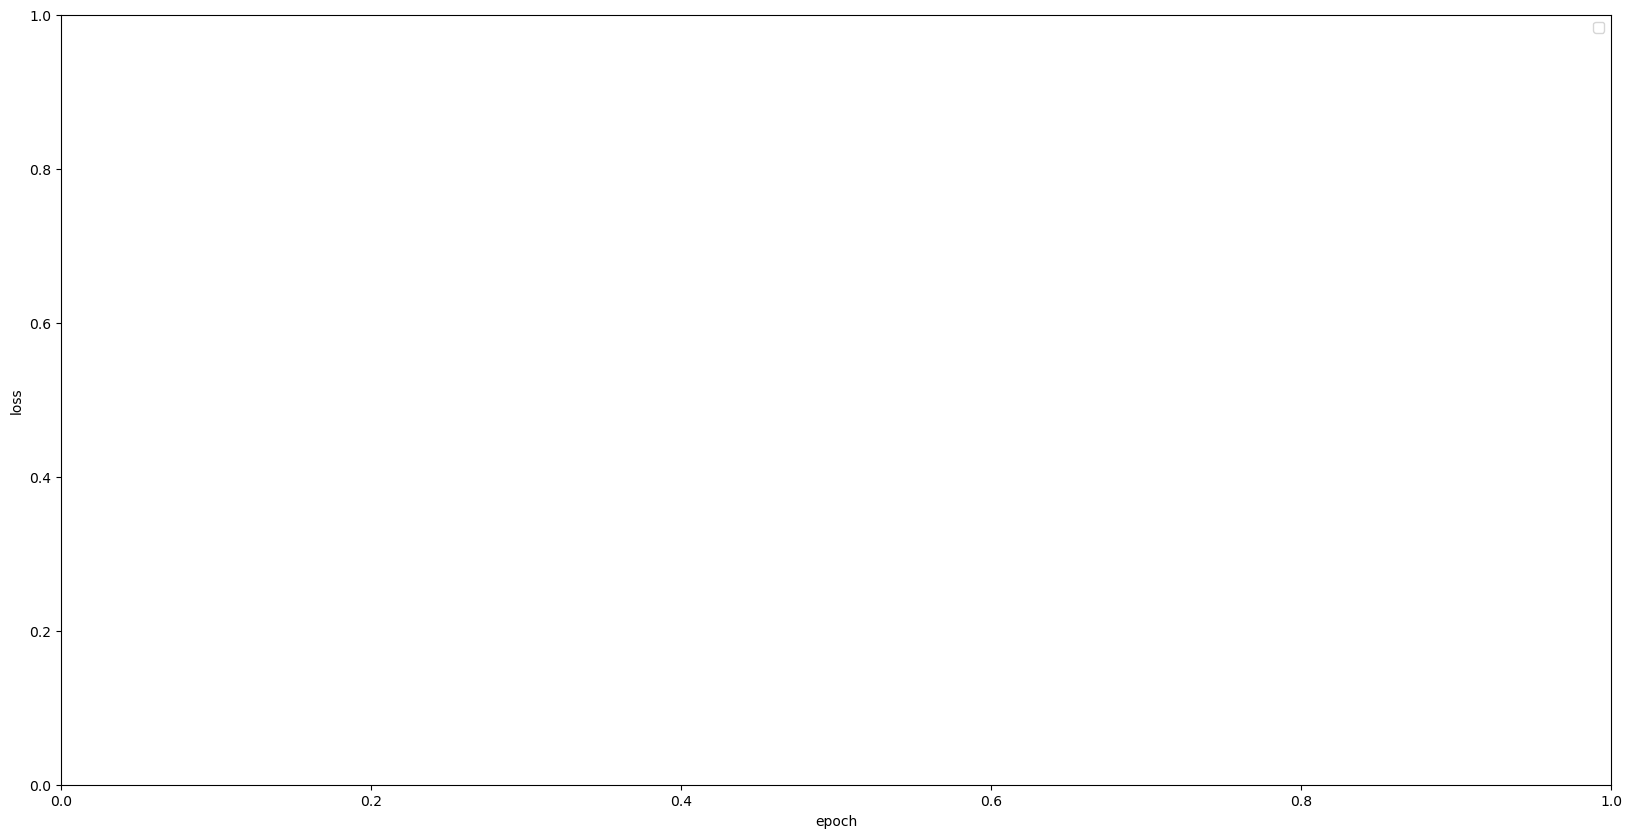

In [48]:
for his in history:
    plt.subplot(1, 2, 1)
    plt.plot(his.history['loss'])

    plt.subplot(1, 2, 2)
    plt.plot(his.history['acc'])

plt.figure(figsize=(20, 10))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['and', 'or', 'xor'])
plt.show()